In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split #切割
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.cross_validation import cross_val_score #交叉验证
from sklearn import datasets

e:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris = datasets.load_iris() #载入数据

In [3]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [4]:
x = iris.data
y = iris.target

In [5]:
knn = KNeighborsClassifier(n_neighbors=5) #最佳的n_neighbers
# 交叉验证
cross_val_score(knn,x,y,cv=5,scoring="accuracy")

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [6]:
k_range = range(1,30) #n_neighbors=5
k_score = [] #保存每一个准确率

In [7]:
for k in k_range:
    knn_tmp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_tmp,x,y,cv=10,scoring="accuracy")
    k_score.append((k,scores.mean()))
k_range

range(1, 30)

In [8]:
k_score

[(1, 0.96),
 (2, 0.9533333333333334),
 (3, 0.9666666666666666),
 (4, 0.9666666666666666),
 (5, 0.9666666666666668),
 (6, 0.9666666666666668),
 (7, 0.9666666666666668),
 (8, 0.9666666666666668),
 (9, 0.9733333333333334),
 (10, 0.9666666666666668),
 (11, 0.9666666666666668),
 (12, 0.9733333333333334),
 (13, 0.9800000000000001),
 (14, 0.9733333333333334),
 (15, 0.9733333333333334),
 (16, 0.9733333333333334),
 (17, 0.9733333333333334),
 (18, 0.9800000000000001),
 (19, 0.9733333333333334),
 (20, 0.9800000000000001),
 (21, 0.9666666666666666),
 (22, 0.9666666666666666),
 (23, 0.9733333333333334),
 (24, 0.96),
 (25, 0.9666666666666666),
 (26, 0.96),
 (27, 0.9666666666666666),
 (28, 0.9533333333333334),
 (29, 0.9533333333333334)]

In [9]:
k_score.sort(key=lambda x:x[1], reverse=True)
k_score

[(13, 0.9800000000000001),
 (18, 0.9800000000000001),
 (20, 0.9800000000000001),
 (9, 0.9733333333333334),
 (12, 0.9733333333333334),
 (14, 0.9733333333333334),
 (15, 0.9733333333333334),
 (16, 0.9733333333333334),
 (17, 0.9733333333333334),
 (19, 0.9733333333333334),
 (23, 0.9733333333333334),
 (5, 0.9666666666666668),
 (6, 0.9666666666666668),
 (7, 0.9666666666666668),
 (8, 0.9666666666666668),
 (10, 0.9666666666666668),
 (11, 0.9666666666666668),
 (3, 0.9666666666666666),
 (4, 0.9666666666666666),
 (21, 0.9666666666666666),
 (22, 0.9666666666666666),
 (25, 0.9666666666666666),
 (27, 0.9666666666666666),
 (1, 0.96),
 (24, 0.96),
 (26, 0.96),
 (2, 0.9533333333333334),
 (28, 0.9533333333333334),
 (29, 0.9533333333333334)]

In [10]:
k_score[0]

(13, 0.9800000000000001)

In [11]:
k_score[0][0]

13

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
plt.plot(k_range,k_score[:,1])
plt.show()

TypeError: list indices must be integers or slices, not tuple

In [14]:
list1 = []
list2 = []
for line in k_score:
    list1.append(line[0])
    list2.append(line[1])

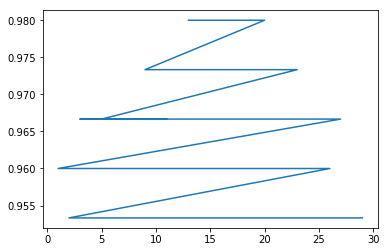

In [15]:
plt.plot(list1, list2)
plt.show()

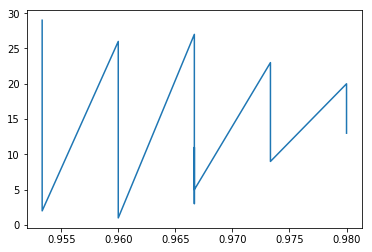

In [16]:
plt.plot(list2, list1)
plt.show()

In [17]:
# param_grid = {'n_neighbors':[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
#               'gamma':[0.001, 0.0001]}
param_grid = {'n_neighbors': [x for x in range(1,30)]}
param_grid

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29]}

In [18]:
from sklearn.grid_search import GridSearchCV
grid_search = GridSearchCV(knn, param_grid, n_jobs=1, verbose=1)
grid_search.fit(x, y)

Fitting 3 folds for each of 29 candidates, totalling 87 fits


[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [19]:
best_parameters = grid_search.best_estimator_.get_params()
best_parameters

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [20]:
best_parameters["n_neighbors"]

5